In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('drive/My Drive/FastAI_BioInf/CT_Pics')

In [0]:
folderBrains = 'Brains'
fileBrains = 'urls_brains.csv'

folderBreasts = 'Breasts'
fileBreasts = 'urls_breasts.csv'

folderIntestines = 'Intestines'
fileIntestines = 'urls_intestines.csv'

folderLungs = 'Lungs'
fileLungs = 'urls_lungs.csv'



destBrains = path/folderBrains
destBrains.mkdir(parents=True, exist_ok=True)

destBreasts = path/folderBreasts
destBreasts.mkdir(parents=True, exist_ok=True)

destIntestines = path/folderIntestines
destIntestines.mkdir(parents=True, exist_ok=True)

destLungs = path/folderLungs
destLungs.mkdir(parents=True, exist_ok=True)


In [0]:
classes = ['Brains','Breasts','Intestines','Lungs']

In [0]:
#download_images(path/fileBrains, destBrains, max_pics=200)
#download_images(path/fileBreasts, destBreasts, max_pics=200)
#download_images(path/fileIntestines, destIntestines, max_pics=200)
#download_images(path/fileLungs, destLungs, max_pics=200)

In [68]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Brains


Breasts


Intestines


Lungs


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [70]:
data.classes

['Brains', 'Breasts', 'Intestines', 'Lungs']

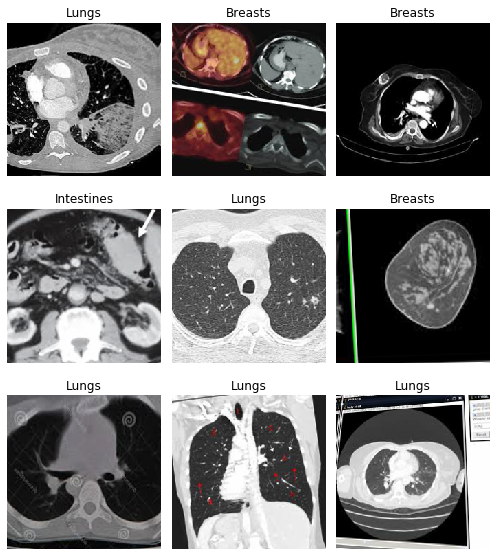

In [71]:
data.show_batch(rows=3, figsize=(7,8))

In [72]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Brains', 'Breasts', 'Intestines', 'Lungs'], 4, 392, 98)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [74]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.928658,1.331633,0.367347,00:05
1,1.328344,1.245145,0.244898,00:05
2,1.026753,1.018150,0.234694,00:05
3,0.837909,0.934799,0.234694,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [77]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


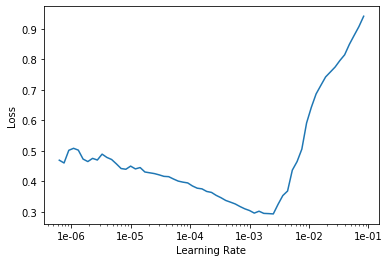

In [78]:
learn.recorder.plot()

In [79]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.430613,1.149787,0.214286,00:05
1,0.335938,1.107685,0.214286,00:05


In [80]:
learn.load('stage-2');

FileNotFoundError: ignored

In [81]:
interp = ClassificationInterpretation.from_learner(learn)

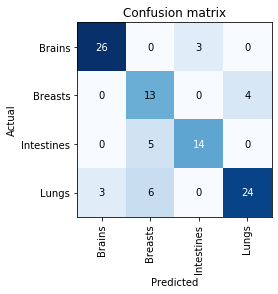

In [82]:
interp.plot_confusion_matrix()